<a href="https://colab.research.google.com/github/crojasce/ProyectoBE/blob/main/Copia_de_ML_BioSta_PROYECTO_Diabetes_CR_JM_JR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Métodos de Machine Learning en Bioestadística**
##**Proyecto: Diabetes Mellitus**

Integrantes:
- Carolina Rojas
- Jorge Marulanda
- Jheremy Reyes

**Importancia global de la diabetes mellitus**

La diabetes mellitus representa una de las crisis sanitarias más urgentes a nivel mundial. Según la última edición del IDF Diabetes Atlas (2025), aproximadamente 589 millones de adultos entre 20 y 79 años viven con diabetes, cifra que podría aumentar hasta 853 millones para 2050 si no se adoptan medidas efectivas.

- En 2024, la diabetes fue responsable de 3,4 millones de muertes y generó un gasto sanitario global estimado en 1 billón de dólares estadounidenses
Diabetes Atlas
- La carga recae de manera desproporcionada sobre los países de ingresos bajos y medios, que concentran aproximadamente el 81 % de los adultos con diabetes, con una proporción significativa de casos no diagnosticados

- Esta enfermedad crónica conlleva complicaciones graves como daño vascular, renal, ocular y aumento de mortalidad precoz, lo que resalta la necesidad imperiosa de mejorar la detección temprana, el acceso al tratamiento y las políticas de salud pública.

**Importancia de la diabetes mellitus en Colombia**

En Colombia, la situación también es preocupante. Datos del IDF Diabetes Atlas indican que el 8,4 % de la población adulta padece diabetes, lo que equivale a unos 3 033 800 casos en un total de 36 728 500 adultos
International Diabetes Federation
. En Bogotá, un estudio transversal realizado entre 2022 y 2023 muestra que el 11 % de los adultos tienen diabetes tipo 2, cifra superior a la estimada previamente, con elevadas tasas asociadas a factores como edad avanzada, obesidad abdominal, dislipidemia y bajo nivel educativo
PubMed
. Estos datos enfatizan la urgencia de intervenciones conjuntas entre políticas públicas, atención primaria y educación comunitaria para prevenir un aumento mayor de la prevalencia y sus complicaciones en el país.

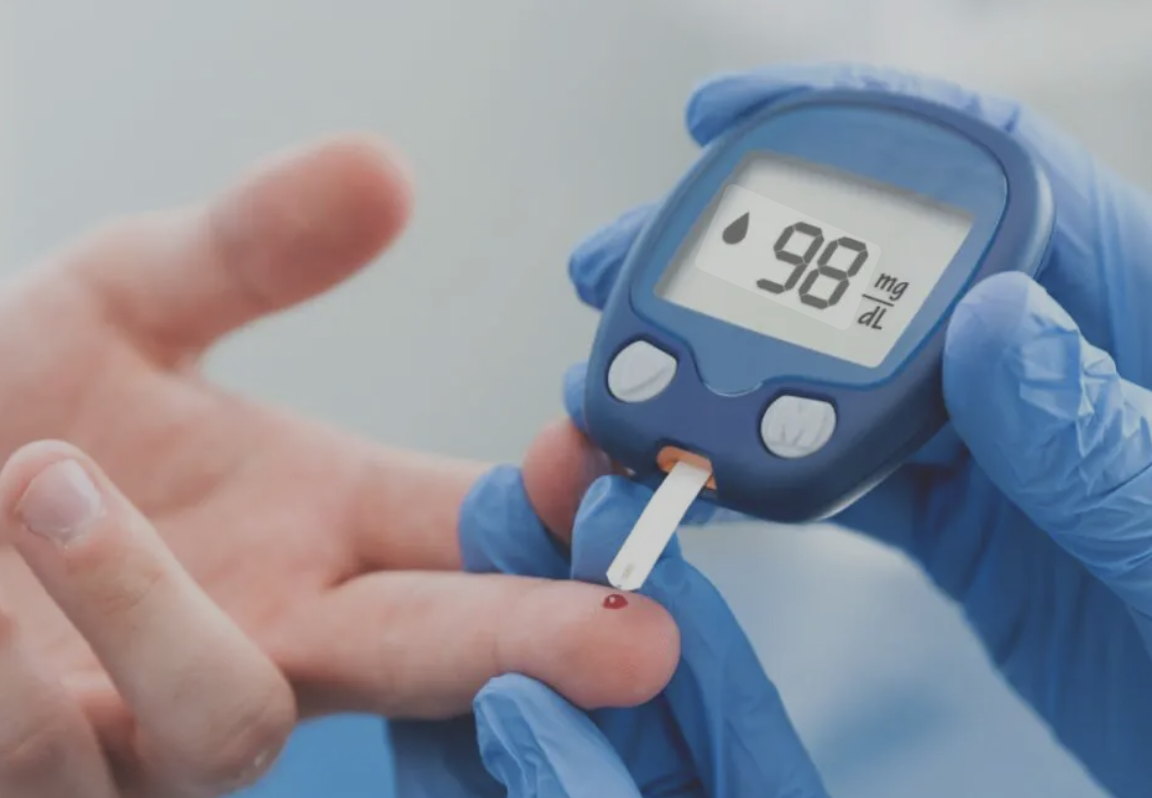

**Contexto y motivación:**

La diabetes mellitus es una de las principales causas de morbilidad y mortalidad en el mundo. La medición de la hemoglobina glicosilada (HbA1c) es un indicador clave del control glucémico y se ha asociado con mejores resultados clínicos y menor riesgo de complicaciones. En el contexto hospitalario, la identificación y manejo oportuno del control glucémico representan una oportunidad para reducir reingresos y optimizar la atención. Nuestro proyecto se centra en analizar datos clínicos de hospitalizaciones en pacientes con diagnóstico de diabetes, explorando el papel de la HbA1c y otras variables en la predicción de riesgo.

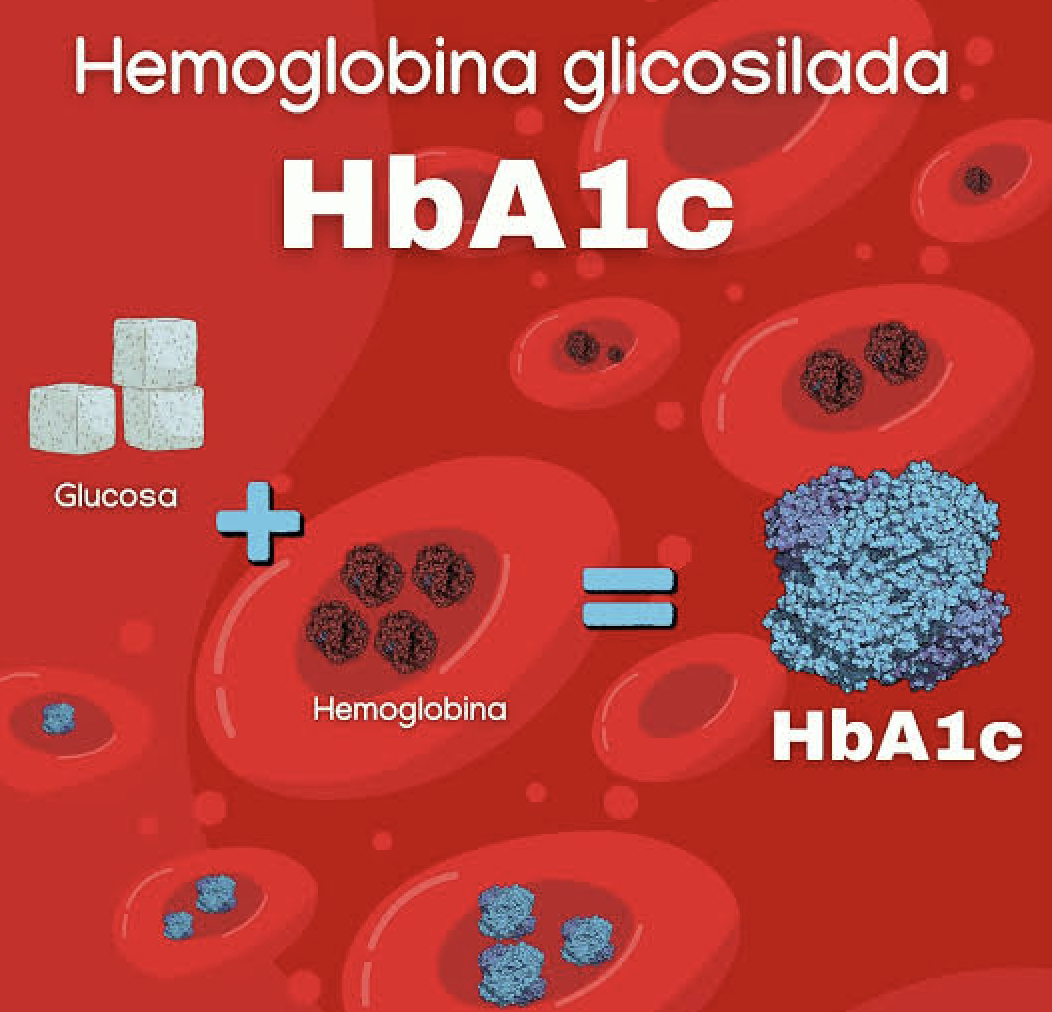

**Objetivo general:**

Desarrollar modelos de machine learning que predigan el riesgo de resultados adversos (p. ej., reingreso hospitalario) en pacientes con diabetes mellitus, utilizando como variable principal el resultado de la HbA1c, e identificar factores asociados para generar explicaciones interpretables y útiles para la práctica clínica.

**Preguntas de investigación**

¿Cómo la inclusión de HbA1c mejora la capacidad predictiva de los modelos de reingreso hospitalario en comparación con modelos que solo usan variables demográficas y clínicas?

**Actividades para el desarrollo del objetivo**

- Realizar un análisis descriptivo de las características demográficas, clínicas y de tratamiento de los pacientes diabéticos hospitalizados.
- Preprocesar los datos mediante limpieza, imputación y codificación adecuada para su uso en modelos predictivos.
- Entrenar y evaluar modelos supervisados (regresión logística) para predecir reingreso hospitalario, incorporando HbA1c y variables relevantes.
- Comparar desempeño de los modelos mediante métricas de discriminación y calibración.
= Identificar las variables más influyentes mediante interpretabilidad global (importancias, SHAP) y local, para guiar decisiones clínicas.

**Datos y población**

Se utilizará el dataset diabetes 130 US hospitals for years 1999–2008 (UCI Repository), que contiene 69 984 registros de hospitalizaciones únicas correspondientes a pacientes con diagnóstico de diabetes. Cada instancia representa un encuentro hospitalario (1–14 días) con medición de laboratorio y administración de medicamentos. El conjunto incluye 55 variables, que abarcan datos demográficos (edad, sexo, raza), tipo de admisión, diagnósticos ICD-9, HbA1c, pruebas de glucosa, uso de medicamentos antidiabéticos y cambios en la medicación, entre otros. La variable objetivo propuesta será reingreso hospitalario (categorías: <30 días, >30 días, no reingreso), mientras que HbA1c se analizará como predictor clave y posible punto de decisión clínica.

##**Dataset: Diabetes 130 US hospitals for years 1999–2008**

**Datos demográficos**

- race – Raza (Caucasian, AfricanAmerican, Asian, Hispanic, Other).
- gender – Género (Male, Female, Unknown/Invalid).
- age – Edad en intervalos de 10 años: [0-10), [10-20), ..., [90-100).
- weight – Peso en libras (97 % faltante).

**Información de admisión y egreso**

- Admission_type_id – Tipo de admisión (emergency, urgent, elective, etc.).
- Discharge_disposition_id – Disposición al alta (home, expired, hospice, etc.).
- Admission_source_id – Fuente de admisión (ER, physician referral, etc.).

**Estancia hospitalaria**

- time_in_hospital – Días de hospitalización (1–14).
- payer_code – Código del seguro (alto % de faltantes).
- medical_specialty – Especialidad del médico (internal medicine, cardiology, etc.).

**Diagnósticos**

- diag_1 – Diagnóstico primario (códigos ICD-9, solo 3 dígitos).
- diag_2 – Diagnóstico secundario.
- diag_3 – Diagnóstico adicional.
- number_diagnoses – Número total de diagnósticos.

**Pruebas de laboratorio**

- num_lab_procedures – Número de pruebas de laboratorio realizadas.
- num_procedures – Número de procedimientos (excluye lab).
- num_medications – Número de medicamentos diferentes administrados.

**Historial de visitas previas**

- number_outpatient – Visitas ambulatorias previas (último año).
- number_emergency – Visitas a urgencias previas (último año).
- number_inpatient – Hospitalizaciones previas (último año).

**Resultados de glucosa y HbA1c**

- max_glu_serum – Resultado de glucosa sérica: >200, >300, normal, none.
- A1Cresult – Resultado de HbA1c: >8, >7, normal, none.

**Información sobre medicación**

- change – Si hubo cambio en la medicación (yes/no).
- diabetesMed – Si se prescribió medicación antidiabética (yes/no).

**Medicamentos específicos (24 variables)**

Cada variable indica si el medicamento fue usado y si la dosis cambió:
- metformin
- repaglinide
- nateglinide
- chlorpropamide
- glimepiride
- acetohexamide
- glipizide
- glyburide
- tolbutamide
- pioglitazone
- rosiglitazone
- acarbose
- miglitol
- troglitazone
- tolazamide
- examide
- citagliptin
- insulin
- glyburide-metformin
- glipizide-metformin
- glimepiride-pioglitazone
- metformin-rosiglitazone
- metformin-pioglitazone

**Variable objetivo**

- readmitted – Estado de reingreso: <30 días, >30 días, No.


**Total**: 55 variables

(2 identificadores + 6 demográficas y administrativas + 3 diagnósticos + 4 hospitalización + 6 clínicas + 24 medicamentos + 1 objetivo).

In [1]:
# Instalar librerías adicionales necesarias
!pip install -q prince==0.13.0 seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 9.0 MB/s eta 0:00:00


**Análisis Exploratorio de Datos**

In [30]:
import zipfile, os, warnings
import pandas as pd
warnings.filterwarnings("ignore")

# Ruta del ZIP (ajusta el nombre si cambia)
zip_path = "/content/diabetes+130-us+hospitals+for+years+1999-2008 (2).zip"

# Carpeta de extracción
extract_path = "/content/data"
os.makedirs(extract_path, exist_ok=True)

# Extraer
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Archivos extraídos:", os.listdir(extract_path))

# Cargar CSV principal
df = pd.read_csv(os.path.join(extract_path, "diabetic_data.csv"))

print("Dimensiones iniciales:", df.shape)
df.head(3)

Archivos extraídos: ['IDS_mapping.csv', 'diabetic_data.csv']
Dimensiones iniciales: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO


**Resumen general del dataset**

In [31]:
# Información general
df.info()

# Valores faltantes
df.isnull().sum().sort_values(ascending=False).head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,0
max_glu_serum,96420
A1Cresult,84748
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [32]:
# Mostrar SOLO columnas con valores faltantes (>0)
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


,0
max_glu_serum,96420
A1Cresult,84748


Las dos variables (glucosa sérica y HbA1c) tienen muchísimos "missing".

En realidad, no es que estén vacíos: en el dataset, los faltantes están representados con la categoría "None".

Probablemente interpretó "None" como un valor normal, pero al parecer también hay valores reales perdidos (NaN).¨Esto quiere decir que vamos a tener que tratarlos cuidadosamente en el preprocesamiento:

+ Mantener "None" como una categoría válida (significa que no se midió).

+ Para los NaN reales, se pueden imputar como "None" también.

 **Distribución de la variable objetivo (readmitted)**

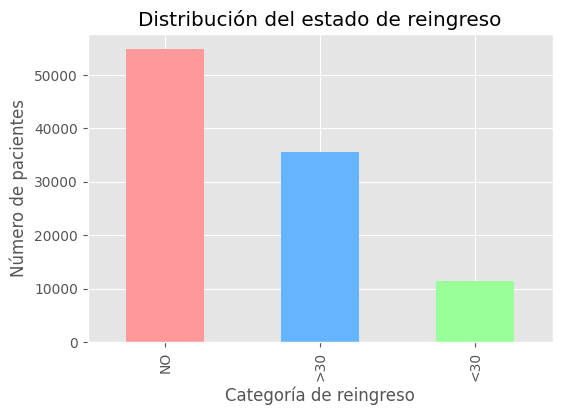

In [8]:
df['readmitted'].value_counts().plot(
    kind="bar",
    figsize=(6,4),
    color=["#ff9999","#66b3ff","#99ff99"]
)
plt.title("Distribución del estado de reingreso")
plt.xlabel("Categoría de reingreso")
plt.ylabel("Número de pacientes")
plt.show()


Hallazgos:

*  NO reingreso (barra roja): es la categoría más frecuente, con más de la mitad de los pacientes.

*  Reingreso >30 días (barra azul): ocupa el segundo lugar, con una proporción considerable.

*  Reingreso <30 días (barra verde): es claramente la categoría minoritaria.

*Importante:*

Esto confirma un problema de desbalance de clases:

*  La categoría que más nos interesa (reingreso temprano <30 días) es la menos representada. Esto implica que al entrenar modelos de Machine Learning, vamos a necesitar técnicas de balanceo, como:

+ Class Weights (ajustar pesos en la función de pérdida).

+ Oversampling/SMOTE (generar ejemplos sintéticos para la clase minoritaria).

+ Undersampling de clases mayoritarias (menos usado porque se pierde información).

**Variables demográficas**

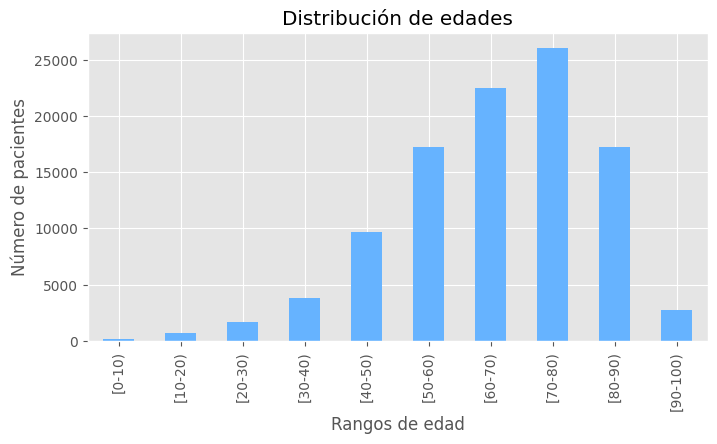

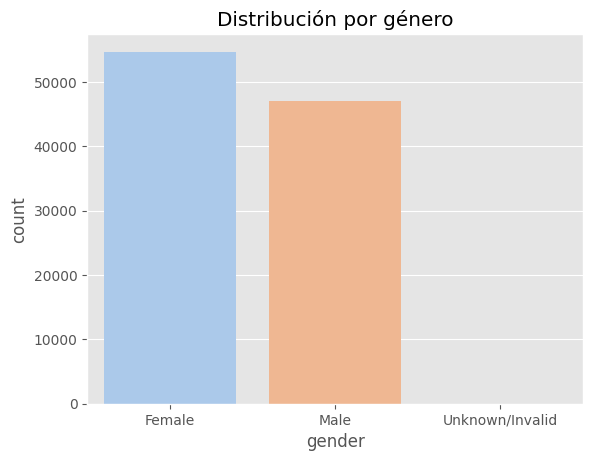

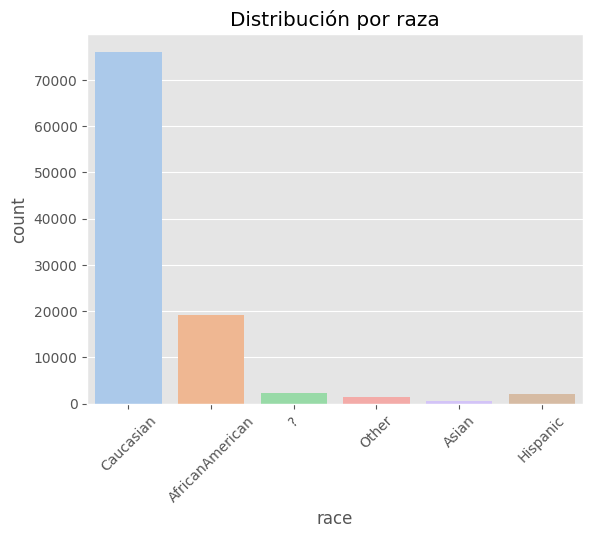

In [9]:
# Edad
df['age'].value_counts().sort_index().plot(
    kind="bar", figsize=(8,4), color="#66b3ff"
)
plt.title("Distribución de edades")
plt.xlabel("Rangos de edad")
plt.ylabel("Número de pacientes")
plt.show()

# Género
sns.countplot(x="gender", data=df, palette="pastel")
plt.title("Distribución por género")
plt.show()

# Raza
sns.countplot(x="race", data=df, palette="pastel")
plt.title("Distribución por raza")
plt.xticks(rotation=45)
plt.show()


+ La mayoría de los pacientes están en los rangos [60–70), [70–80) y [50–60).

+ Muy pocos pacientes son jóvenes: casi no hay en [0–30).

+ Esto tiene sentido clínico: la diabetes es más prevalente en adultos mayores, y los riesgos de complicaciones aumentan con la edad.

*Distribución por género:*
+ Mujeres (Female): ligeramente más que los hombres.

+ Hombres (Male): segunda categoría más frecuente.

+ Hay unos pocos casos marcados como Unknown/Invalid que probablemente debamos limpiar o recodificar.

Esto refleja que la diabetes afecta tanto a hombres como a mujeres, sin un sesgo extremo de género en este dataset.

*Distribución por raza:*

+ La gran mayoría de pacientes registrados son Caucasian.

+ El segundo grupo más frecuente es AfricanAmerican.

+ Minorías: Hispanic, Asian, Other, con números pequeños.

Hay algunos valores "?", que representan missing values codificados como texto → estos debemos tratarlos en preprocesamiento (por ejemplo, recodificar como "Unknown").

*Esto significa que, aunque el dataset es grande, puede no ser representativo de todas las poblaciones, algo a tener en cuenta cuando se interpreten los modelos.*

**Variables clínicas importantes**

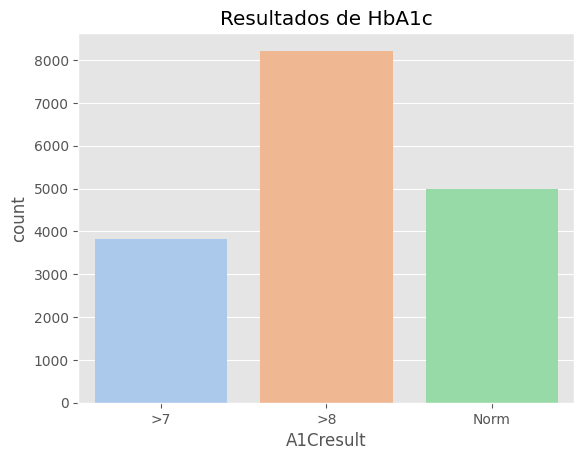

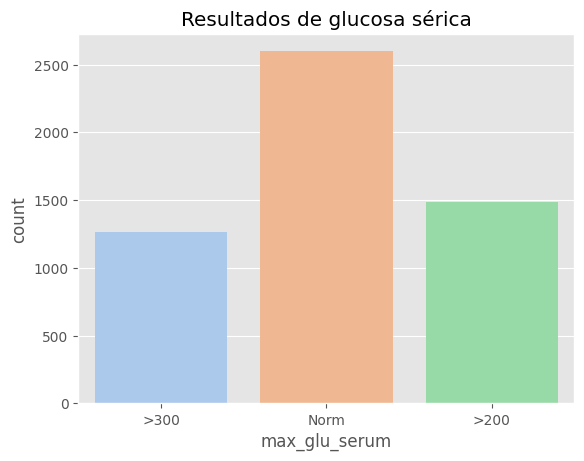

In [10]:
# HbA1c
sns.countplot(x="A1Cresult", data=df, palette="pastel")
plt.title("Resultados de HbA1c")
plt.show()

# Glucosa sérica
sns.countplot(x="max_glu_serum", data=df, palette="pastel")
plt.title("Resultados de glucosa sérica")
plt.show()


*Resultados de HbA1c*

Categorías principales observadas:

+ >8 → la más frecuente, indica mal control glucémico.

+ Norm (normal) → cantidad intermedia.

+ >7 → menor frecuencia que las anteriores.

La mayoría de pacientes que sí tienen un valor registrado de HbA1c presentan niveles altos (>8), lo que confirma que el dataset refleja una población de alto riesgo (pacientes hospitalizados con diabetes).

*Resultados de glucosa sérica*

Categorías principales:

+ Norm (normal) → es la más frecuente dentro de quienes tienen el dato.

+ >200 y >300 → representan casos de hiperglucemia importante, con menor frecuencia pero aún relevantes.

La glucosa sérica muestra menos registros que HbA1c (muchos faltantes). Dentro de los que sí se midieron, predominan los normales, pero hay un grupo relevante con valores críticos (>200, >300).




**Factores hospitalarios**

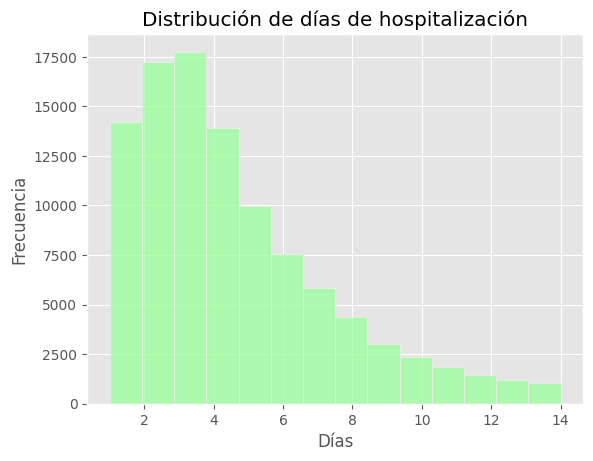

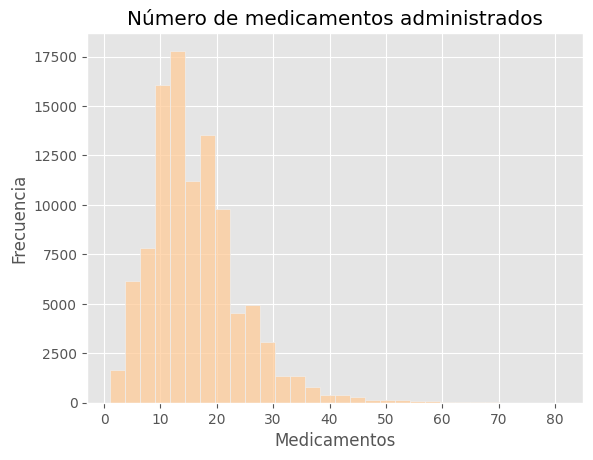

In [11]:
# Días en hospital
sns.histplot(df['time_in_hospital'], bins=14, kde=False, color="#99ff99")
plt.title("Distribución de días de hospitalización")
plt.xlabel("Días")
plt.ylabel("Frecuencia")
plt.show()

# Número de medicamentos
sns.histplot(df['num_medications'], bins=30, kde=False, color="#ffcc99")
plt.title("Número de medicamentos administrados")
plt.xlabel("Medicamentos")
plt.ylabel("Frecuencia")
plt.show()


*Distribución de días de hospitalización*

+ La mayoría de los pacientes estuvo hospitalizado entre 2 y 4 días.

+ A medida que aumentan los días, la frecuencia cae rápidamente.

+ El máximo permitido en el dataset es 14 días, pero muy pocos llegan a ese límite.

+ Los pacientes diabéticos suelen tener estancias cortas a moderadas, aunque los más graves pueden extenderse. Esto puede estar relacionado con el riesgo de reingreso.

*Número de medicamentos administrados*

+ La mayoría recibió entre 5 y 20 medicamentos diferentes durante la hospitalización.

+ Hay una larga “cola” de pacientes que recibieron muchos más medicamentos (incluso >50), pero son casos poco frecuentes.

+ El número de medicamentos puede reflejar la complejidad clínica del paciente. Aquellos con polifarmacia (muchos medicamentos) probablemente tengan mayor riesgo de complicaciones y reingresos.

**Relaciones entre variables**

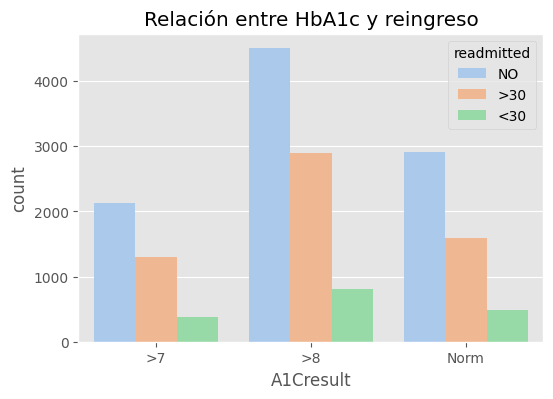

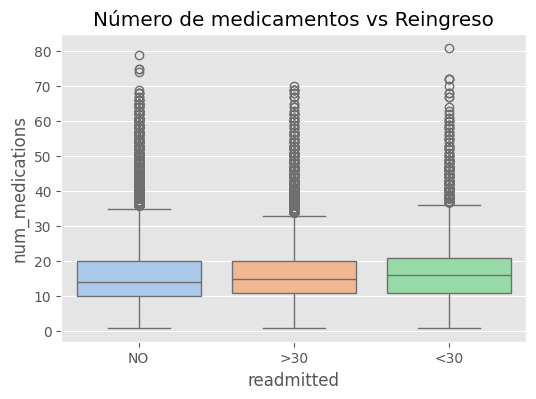

In [12]:
# HbA1c vs Reingreso
plt.figure(figsize=(6,4))
sns.countplot(x="A1Cresult", hue="readmitted", data=df, palette="pastel")
plt.title("Relación entre HbA1c y reingreso")
plt.show()

# Número de medicamentos vs Reingreso
plt.figure(figsize=(6,4))
sns.boxplot(x="readmitted", y="num_medications", data=df, palette="pastel")
plt.title("Número de medicamentos vs Reingreso")
plt.show()


+ Los pacientes readmitidos (>30 y <30) tienden a recibir una mayor cantidad de medicamentos en comparación con los que no fueron readmitidos.

+ La mediana del número de medicamentos es ligeramente mayor para aquellos con readmisión dentro de 30 días.

*Esto indica que tanto un mal control de glucosa (HbA1c alta) como el mayor número de medicamentos recetados están relacionados con una alta tasa de readmisión.*

**Preparación de datos**

El conjunto de datos original presentaba retos importantes de calidad y heterogeneidad que debieron abordarse antes de la modelación. En primer lugar, se identificaron valores faltantes y categorías especiales como “None”, que en este contexto no corresponden a datos perdidos sino a la indicación de que una prueba no fue realizada (por ejemplo, en las variables A1Cresult y max_glu_serum). Estas categorías se conservaron explícitamente como niveles válidos, permitiendo al modelo aprender del hecho de que una medición no haya sido solicitada. Por otro lado, los valores codificados como “?” en variables diagnósticas fueron tratados como ausentes y adecuadamente imputados o recategorizados. Posteriormente, las variables categóricas fueron transformadas mediante codificación One-Hot, mientras que las variables numéricas se normalizaron para garantizar escalas comparables entre predictores. Finalmente, dada la marcada desproporción entre clases (pacientes reingresados vs. no reingresados), se implementaron técnicas de balanceo de clases (SMOTE y el parámetro scale_pos_weight en XGBoost), con el fin de mitigar el sesgo hacia la clase mayoritaria y mejorar la capacidad de detección de reingresos.

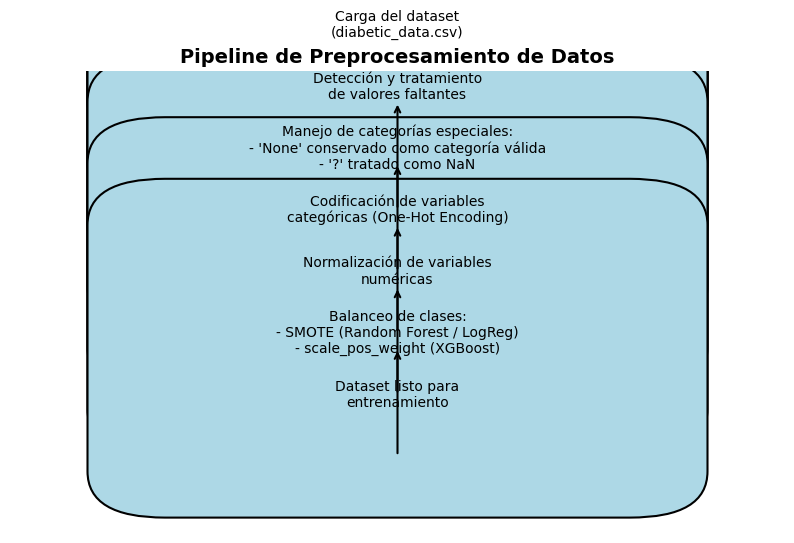

In [1]:
# ============================
# Diagrama de flujo del preprocesamiento
# ============================
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Pasos del preprocesamiento
steps = [
    "Carga del dataset\n(diabetic_data.csv)",
    "Detección y tratamiento\nde valores faltantes",
    "Manejo de categorías especiales:\n- 'None' conservado como categoría válida\n- '?' tratado como NaN",
    "Codificación de variables\ncategóricas (One-Hot Encoding)",
    "Normalización de variables\nnuméricas",
    "Balanceo de clases:\n- SMOTE (Random Forest / LogReg)\n- scale_pos_weight (XGBoost)",
    "Dataset listo para\nentrenamiento"
]

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis("off")

# Posiciones Y (para apilar los bloques verticalmente)
y_positions = list(range(len(steps)*2, 0, -2))

# Dibujar recuadros y flechas
for i, (step, y) in enumerate(zip(steps, y_positions)):
    ax.add_patch(mpatches.FancyBboxPatch(
        (0.2, y/15), 0.6, 0.8/1.5,
        boxstyle="round,pad=0.1", fc="lightblue", ec="black", lw=1.5
    ))
    ax.text(0.5, y/15 + 0.25/1.5, step,
            ha="center", va="center", fontsize=10, wrap=True)

    # Flecha al siguiente paso
    if i < len(steps)-1:
        ax.annotate("",
                    xy=(0.5, (y-2)/15 + 0.8/3),
                    xytext=(0.5, y/15 - 0.1),
                    arrowprops=dict(arrowstyle="->", lw=1.5))

plt.title("Pipeline de Preprocesamiento de Datos", fontsize=14, weight="bold")
plt.show()


In [14]:
# Eliminar columnas con demasiados faltantes
cols_drop = ["weight", "payer_code", "medical_specialty"]
df = df.drop(columns=cols_drop, errors="ignore")

# Rellenar NA en A1Cresult y max_glu_serum con "None"
df["A1Cresult"] = df["A1Cresult"].fillna("None")
df["max_glu_serum"] = df["max_glu_serum"].fillna("None")


In [15]:
#Limpieza de categorías raras
df["race"] = df["race"].replace("?", "Unknown")
df["gender"] = df["gender"].replace("Unknown/Invalid", "Unknown")


In [16]:
#Variable objetivo (readmitted)
df["readmitted_binary"] = df["readmitted"].apply(lambda x: 1 if x == "<30" else 0)


In [17]:
#Codificación de variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.shape)


(101766, 2341)


In [33]:
#Normalización de variables numéricas

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ["time_in_hospital", "num_lab_procedures", "num_procedures",
            "num_medications", "number_outpatient", "number_emergency",
            "number_inpatient", "number_diagnoses"]

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [ ]:
#Partición del Dataset
#Dividir en train (70%), validación (15%) y test (15%), de forma estratificada para balancear clases.

from sklearn.model_selection import train_test_split
import pandas as pd

# 1) y binaria (si no la creaste antes)
df["readmitted_binary"] = (df["readmitted"] == "<30").astype(int)
y = df["readmitted_binary"]

# 2) Features sin la etiqueta
X_raw = df.drop(columns=["readmitted", "readmitted_binary"])

# 3) One-Hot solo a X
X = pd.get_dummies(X_raw, drop_first=True)

# (opcional) escalar numéricas existentes
num_cols = ["time_in_hospital","num_lab_procedures","num_procedures",
            "num_medications","number_outpatient","number_emergency",
            "number_inpatient","number_diagnoses"]
num_cols = [c for c in num_cols if c in X.columns]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# 4) Split estratificado
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print(X_train.shape, X_valid.shape, X_test.shape)


In [34]:
#Manejo del desbalance de clases

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Antes del SMOTE:", y_train.value_counts())
print("Después del SMOTE:", y_train_res.value_counts())


Antes del SMOTE: readmitted_binary
0    63286
1     7950
Name: count, dtype: int64
Después del SMOTE: readmitted_binary
0    63286
1    63286
Name: count, dtype: int64


📊 Antes del SMOTE

Clase 0 (No reingreso <30 días): 63,286 casos

Clase 1 (Reingreso <30 días): 7,950 casos

👉 Había un fuerte desbalance (~11% positivos vs 89% negativos).

📊 Después del SMOTE

Clase 0: 63,286

Clase 1: 63,286
👉 Ahora el dataset de entrenamiento está perfectamente balanceado (50/50).

*Análisis*
+ Los modelos ya no estarán “sesgados” hacia la clase mayoritaria.

+ Ojo: el valid/test sigue con el desbalance original (¡y debe ser así!). Eso nos permitirá evaluar el modelo en condiciones reales.

+ Métricas como ROC-AUC, Recall y F1-score serán más importantes que la simple exactitud (accuracy), porque accuracy se puede inflar fácilmente en datasets desbalanceados.

**Modelado y validación**

Para la etapa de modelado se entrenaron diferentes algoritmos de aprendizaje supervisado orientados a la clasificación binaria del reingreso hospitalario. Inicialmente se aplicaron modelos de referencia como regresión logística y Random Forest, evaluando su desempeño con métricas estándar (ROC-AUC, exactitud, precisión, recall y F1-score). Posteriormente se implementó un modelo más robusto mediante XGBoost, ajustando el parámetro scale_pos_weight para manejar el marcado desbalance entre clases. Además, se exploró la optimización del umbral de decisión, buscando maximizar métricas críticas según el contexto clínico (recall para detectar la mayor cantidad posible de pacientes en riesgo, o F1 para lograr un balance entre sensibilidad y precisión). La validación de los modelos se realizó sobre un conjunto de datos separado (hold-out) y los resultados evidenciaron que XGBoost con ajuste de umbral presentó el mejor compromiso entre capacidad predictiva (ROC-AUC ≈0.67–0.69) y utilidad clínica, superando en desempeño a los modelos base.

*Regresión logística*

ROC-AUC: 0.5139471949559857

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.61      0.73     13561
           1       0.12      0.42      0.19      1704

    accuracy                           0.59     15265
   macro avg       0.51      0.52      0.46     15265
weighted avg       0.81      0.59      0.67     15265



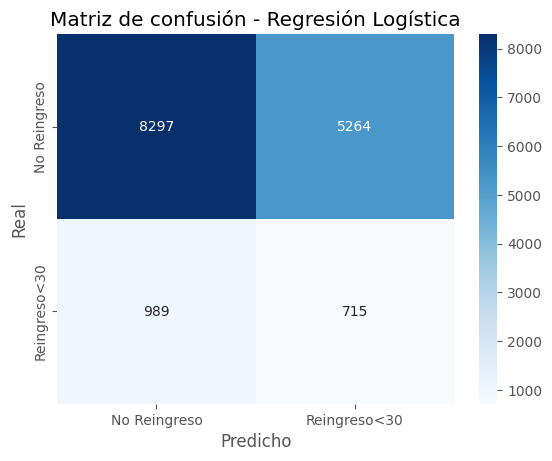

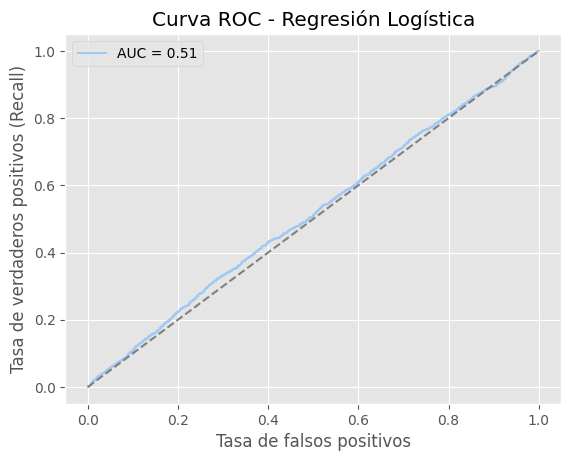

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo base
log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

# Entrenar con datos balanceados
log_reg.fit(X_train_res, y_train_res)

# Predicciones en validación
y_pred = log_reg.predict(X_valid)
y_proba = log_reg.predict_proba(X_valid)[:, 1]

# Métricas
print("ROC-AUC:", roc_auc_score(y_valid, y_proba))
print("\nClassification Report:\n", classification_report(y_valid, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Reingreso", "Reingreso<30"], yticklabels=["No Reingreso", "Reingreso<30"])
plt.title("Matriz de confusión - Regresión Logística")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_valid, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_valid, y_proba):.2f}")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos (Recall)")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.show()


*Interpretación*

+ El modelo aprendió a predecir mayoritariamente la clase 0.

+ Aunque aplicamos SMOTE en entrenamiento, en validación (donde el desbalance se mantiene) el modelo no generaliza bien.

+ Esto confirma que una regresión logística no es suficiente para este problema:

+ No capta relaciones no lineales.

+ Hay muchas variables categóricas complejas que no aprovecha del todo.

Entonces, se escoge comparar con modelos no lineales, que suelen funcionar mucho mejor en datos tabulares y desbalanceados

*Árbol de Decisión*

ROC-AUC: 0.5864601151880929

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     13561
           1       0.15      0.24      0.19      1704

    accuracy                           0.77     15265
   macro avg       0.53      0.54      0.53     15265
weighted avg       0.81      0.77      0.79     15265



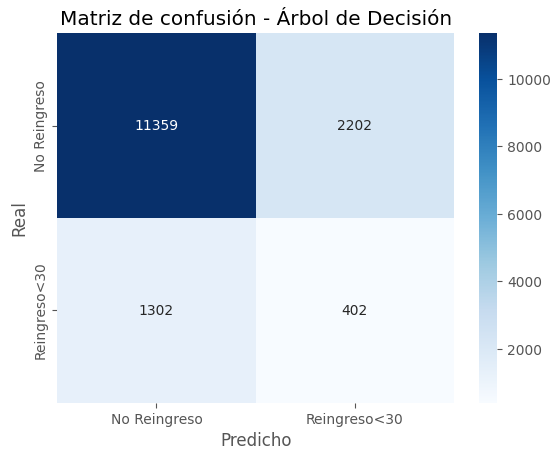

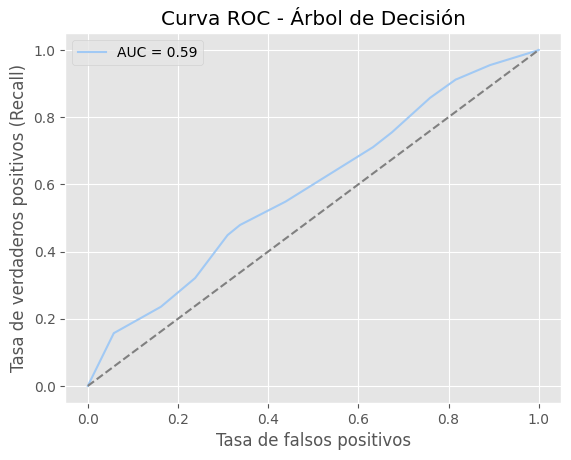

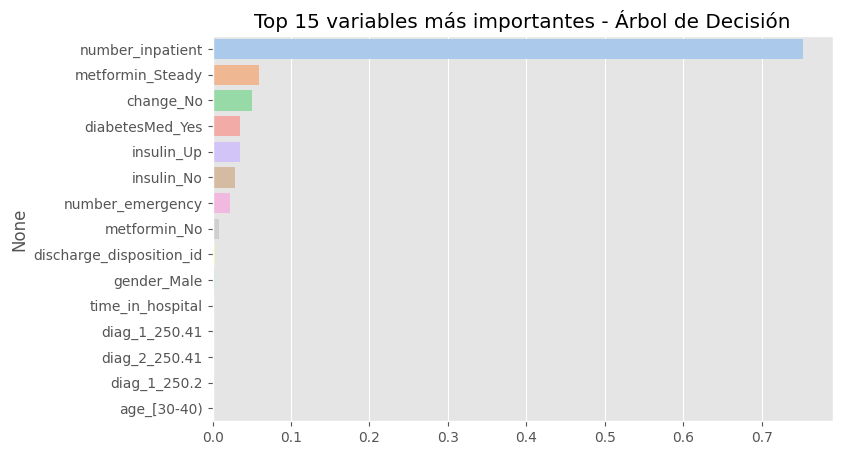

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo base de Árbol de Decisión
tree = DecisionTreeClassifier(
    max_depth=5,          # limitar profundidad para evitar sobreajuste
    class_weight="balanced",  # balancear pesos de clases
    random_state=42
)

# Entrenamos con los datos balanceados por SMOTE
tree.fit(X_train_res, y_train_res)

# Predicciones en validación
y_pred_tree = tree.predict(X_valid)
y_proba_tree = tree.predict_proba(X_valid)[:, 1]

# Métricas
print("ROC-AUC:", roc_auc_score(y_valid, y_proba_tree))
print("\nClassification Report:\n", classification_report(y_valid, y_pred_tree))

# Matriz de confusión
cm = confusion_matrix(y_valid, y_pred_tree)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Reingreso", "Reingreso<30"], yticklabels=["No Reingreso", "Reingreso<30"])
plt.title("Matriz de confusión - Árbol de Decisión")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_valid, y_proba_tree)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_valid, y_proba_tree):.2f}")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos (Recall)")
plt.title("Curva ROC - Árbol de Decisión")
plt.legend()
plt.show()

# Importancia de variables
importances = pd.Series(tree.feature_importances_, index=X_train_res.columns)
importances = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index, palette="pastel")
plt.title("Top 15 variables más importantes - Árbol de Decisión")
plt.show()


*Interpretación*

+ El árbol captura mejor la estructura del dataset que la regresión logística, pero sigue sin ser excelente.

+ El recall de la clase minoritaria (1) sigue bajo → el modelo todavía no es bueno detectando a los pacientes de alto riesgo (<30 días).

+ El ROC-AUC de 0.59 nos dice que mejora respecto a la regresión, pero está lejos de un modelo robusto.

Para este tipo de datos tabulares y desbalanceados, lo normal es que modelos de ensamble (Random Forest y XGBoost) rindan mucho mejor

*Random Forest Classifier*

ROC-AUC: 0.6443916862530045

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     13561
           1       0.43      0.01      0.02      1704

    accuracy                           0.89     15265
   macro avg       0.66      0.50      0.48     15265
weighted avg       0.84      0.89      0.84     15265



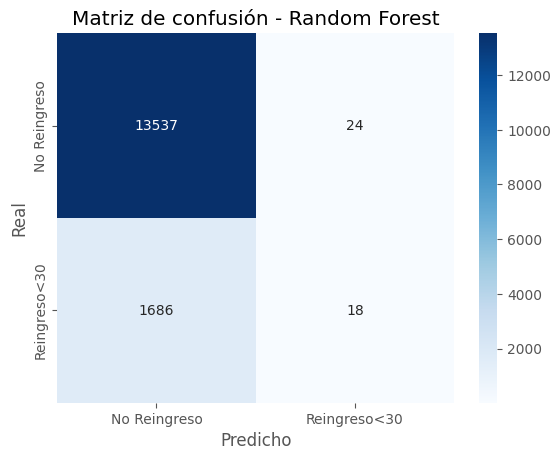

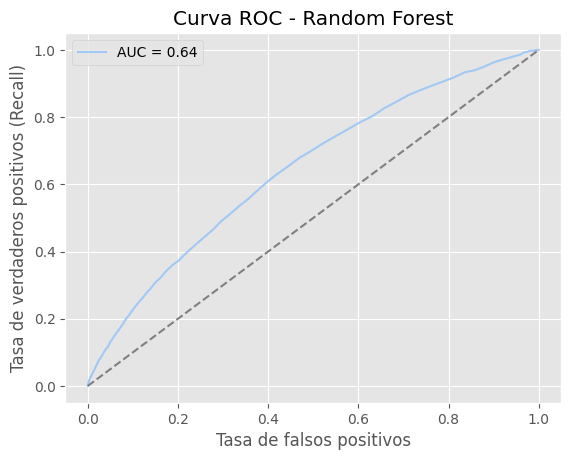

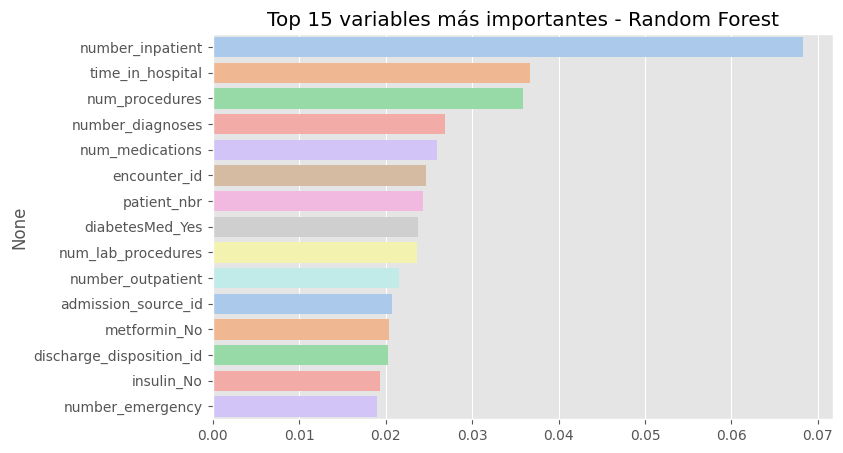

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=200,        # número de árboles
    max_depth=None,          # sin límite de profundidad
    class_weight="balanced", # manejar desbalance de clases
    random_state=42,
    n_jobs=-1                # usar todos los núcleos disponibles
)

# Entrenar con datos balanceados (SMOTE)
rf.fit(X_train_res, y_train_res)

# Predicciones en validación
y_pred_rf = rf.predict(X_valid)
y_proba_rf = rf.predict_proba(X_valid)[:, 1]

# Métricas
print("ROC-AUC:", roc_auc_score(y_valid, y_proba_rf))
print("\nClassification Report:\n", classification_report(y_valid, y_pred_rf))

# Matriz de confusión
cm = confusion_matrix(y_valid, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Reingreso", "Reingreso<30"],
            yticklabels=["No Reingreso", "Reingreso<30"])
plt.title("Matriz de confusión - Random Forest")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_valid, y_proba_rf)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_valid, y_proba_rf):.2f}")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos (Recall)")
plt.title("Curva ROC - Random Forest")
plt.legend()
plt.show()

# Importancia de variables
importances_rf = pd.Series(rf.feature_importances_, index=X_train_res.columns)
top_vars = importances_rf.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x=top_vars.values, y=top_vars.index, palette="pastel")
plt.title("Top 15 variables más importantes - Random Forest")
plt.show()


*Interpretación*

+ Random Forest mejoró el ROC-AUC global, pero falló en captar la clase minoritaria.

+ Esto pasa mucho en datasets clínicos desbalanceados: los modelos priorizan la clase mayoritaria para maximizar accuracy.

+ El recall de la clase 1 (pacientes de riesgo) es crítico en este problema, y aquí quedó prácticamente nulo.

Entonces, se ajusta el umbral de decisión en el Random Forest para mejorar el recall de reingresos.

*Ajustar el uimbral de decision en el random forest*

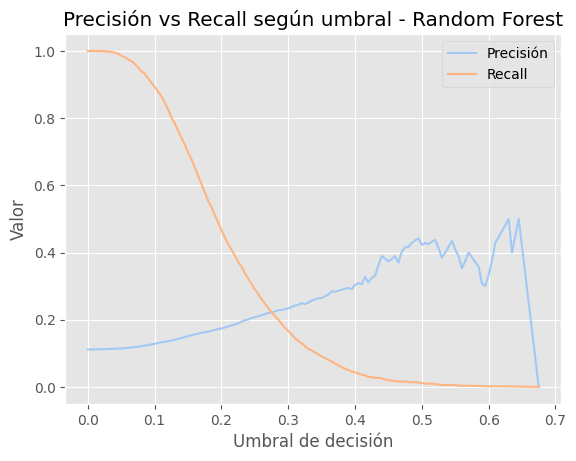


Reporte de clasificación con umbral 0.3:

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     13561
           1       0.23      0.17      0.19      1704

    accuracy                           0.85     15265
   macro avg       0.57      0.55      0.55     15265
weighted avg       0.82      0.85      0.83     15265



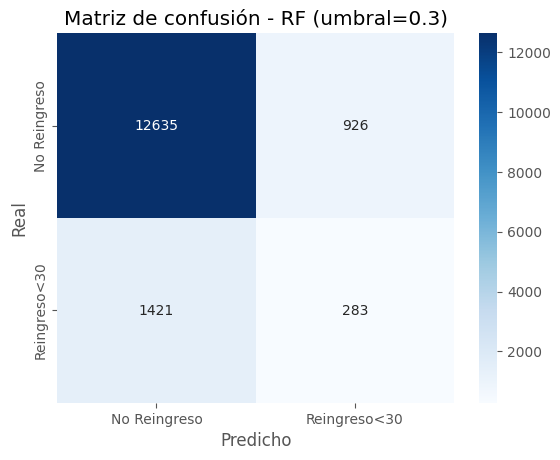

In [38]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Probabilidades de clase positiva
y_proba_rf = rf.predict_proba(X_valid)[:, 1]

# Buscamos distintos umbrales y analizamos trade-off
precisions, recalls, thresholds = precision_recall_curve(y_valid, y_proba_rf)

plt.plot(thresholds, precisions[:-1], label="Precisión")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Umbral de decisión")
plt.ylabel("Valor")
plt.title("Precisión vs Recall según umbral - Random Forest")
plt.legend()
plt.show()

# ==============================
# Ajustar manualmente el umbral
# ==============================
def predict_with_threshold(probas, threshold=0.3):
    return (probas >= threshold).astype(int)

# Ejemplo: cambiar el umbral a 0.3
y_pred_thresh = predict_with_threshold(y_proba_rf, threshold=0.3)

print("\nReporte de clasificación con umbral 0.3:\n")
print(classification_report(y_valid, y_pred_thresh))

# Matriz de confusión
cm = confusion_matrix(y_valid, y_pred_thresh)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Reingreso", "Reingreso<30"],
            yticklabels=["No Reingreso", "Reingreso<30"])
plt.title("Matriz de confusión - RF (umbral=0.3)")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()


*Interpretación*

+ Ajustar el umbral a 0.3 hizo que el modelo detectara más pacientes de alto riesgo (clase 1), aunque comete más errores al clasificar algunos como reingresos cuando no lo son.

+ En un contexto clínico, este trade-off puede ser aceptable: es mejor detectar más pacientes en riesgo (aunque se generen algunas falsas alarmas) que dejar a casi todos sin identificar.

Entonces, se busca el mejor umbral para el balance entre precisión y recall.

*busca automáticamente el mejor umbral*

RESULTADOS BÚSQUEDA DE UMBRALES
----------------------------------------
Mejor umbral (por F1): 0.1950 --> F1=0.2551, Precision=0.1724, Recall=0.4900
Mejor umbral (Youden - ROC): 0.1650
Mejor umbral (max recall con precision>=0.2): 0.2400 -> Prec=0.201, Rec=0.322


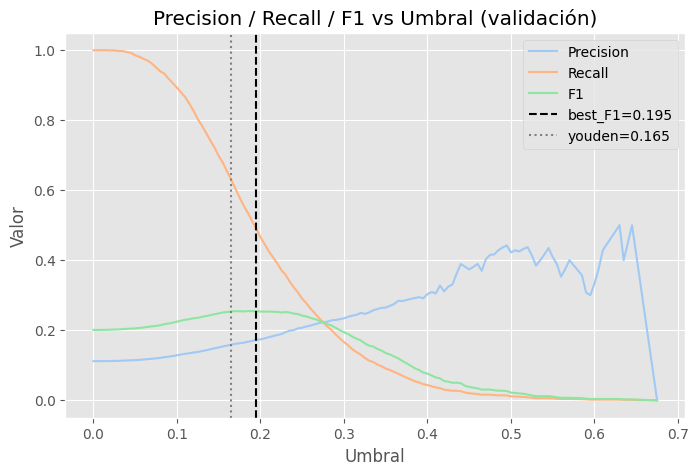


Evaluación con umbral = 0.195
----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0     0.9166    0.7044    0.7966     13561
           1     0.1724    0.4900    0.2551      1704

    accuracy                         0.6805     15265
   macro avg     0.5445    0.5972    0.5259     15265
weighted avg     0.8335    0.6805    0.7362     15265

Matriz de confusión:
 [[9553 4008]
 [ 869  835]]

Evaluación con umbral = 0.165
----------------------------------------
Classification report:
              precision    recall  f1-score   support

           0     0.9259    0.5811    0.7140     13561
           1     0.1589    0.6297    0.2537      1704

    accuracy                         0.5865     15265
   macro avg     0.5424    0.6054    0.4839     15265
weighted avg     0.8402    0.5865    0.6626     15265

Matriz de confusión:
 [[7880 5681]
 [ 631 1073]]

Evaluación con umbral = 0.240
---------------------------

In [39]:
# ----------------------------
# Código: búsqueda automática de umbral
# ----------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve, roc_curve, roc_auc_score,
    f1_score, precision_score, recall_score, confusion_matrix,
    classification_report
)
import seaborn as sns

# 1) obtener probabilidades si no las tienes
try:
    y_proba_valid  # noqa
except NameError:
    y_proba_valid = rf.predict_proba(X_valid)[:, 1]
else:
    y_proba_valid = y_proba_valid if 'y_proba_valid' in globals() else rf.predict_proba(X_valid)[:,1]

# 2) precision-recall y thresholds
precisions, recalls, pr_thresholds = precision_recall_curve(y_valid, y_proba_valid)
# note: len(pr_thresholds) == len(precisions)-1 == len(recalls)-1

# 3) calcular F1 para cada threshold
# alineamos arrays: thresholds correspond to precisions[ :-1 ] and recalls[ :-1 ]
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-12)

# 4) buscar umbral que maximice F1
idx_best_f1 = np.nanargmax(f1_scores)
best_threshold_f1 = pr_thresholds[idx_best_f1]
best_f1 = f1_scores[idx_best_f1]
best_prec_f1 = precisions[idx_best_f1]
best_rec_f1 = recalls[idx_best_f1]

# 5) ROC-based (Youden's J) - alternativa
fpr, tpr, roc_thresholds = roc_curve(y_valid, y_proba_valid)
youden = tpr - fpr
idx_best_youden = np.argmax(youden)
best_threshold_youden = roc_thresholds[idx_best_youden]

# 6) buscar umbral que maximice recall sujeto a precision >= min_prec
min_prec = 0.20  # ajusta esto según tu tolerancia (ej. 0.2)
# encontrar índices donde precision>=min_prec
valid_idxs = np.where(precisions[:-1] >= min_prec)[0]
if valid_idxs.size > 0:
    # entre esos, elegir el que tenga mayor recall
    idx_best_prec_constraint = valid_idxs[np.argmax(recalls[:-1][valid_idxs])]
    best_threshold_prec_constraint = pr_thresholds[idx_best_prec_constraint]
    best_prec_constraint_prec = precisions[idx_best_prec_constraint]
    best_prec_constraint_rec = recalls[idx_best_prec_constraint]
else:
    best_threshold_prec_constraint = None

# 7) Mostrar resultados
print("RESULTADOS BÚSQUEDA DE UMBRALES")
print("-" * 40)
print(f"Mejor umbral (por F1): {best_threshold_f1:.4f} --> F1={best_f1:.4f}, Precision={best_prec_f1:.4f}, Recall={best_rec_f1:.4f}")
print(f"Mejor umbral (Youden - ROC): {best_threshold_youden:.4f}")
if best_threshold_prec_constraint is not None:
    print(f"Mejor umbral (max recall con precision>={min_prec}): {best_threshold_prec_constraint:.4f} -> Prec={best_prec_constraint_prec:.3f}, Rec={best_prec_constraint_rec:.3f}")
else:
    print(f"No se encontró umbral con precision >= {min_prec}")

# 8) Graficas: Precision/Recall/F1 vs Umbral
plt.figure(figsize=(8,5))
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")
plt.plot(pr_thresholds, f1_scores, label="F1")
plt.axvline(best_threshold_f1, color="black", linestyle="--", label=f"best_F1={best_threshold_f1:.3f}")
if best_threshold_youden is not None: plt.axvline(best_threshold_youden, color="gray", linestyle=":", label=f"youden={best_threshold_youden:.3f}")
plt.xlabel("Umbral")
plt.ylabel("Valor")
plt.title("Precision / Recall / F1 vs Umbral (validación)")
plt.legend()
plt.show()

# 9) Función de evaluación con umbral
def eval_with_threshold(y_true, y_proba, threshold):
    y_pred = (y_proba >= threshold).astype(int)
    print(f"\nEvaluación con umbral = {threshold:.3f}")
    print("-" * 40)
    print("Classification report:")
    print(classification_report(y_true, y_pred, digits=4))
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de confusión:\n", cm)
    return y_pred

# 10) Evaluar en validación con los umbrales recomendados
y_pred_f1 = eval_with_threshold(y_valid, y_proba_valid, best_threshold_f1)
y_pred_youden = eval_with_threshold(y_valid, y_proba_valid, best_threshold_youden)
if best_threshold_prec_constraint is not None:
    y_pred_prec_constraint = eval_with_threshold(y_valid, y_proba_valid, best_threshold_prec_constraint)

# 11) Si tienes test set, evaluar también (recomendado)
try:
    y_proba_test = rf.predict_proba(X_test)[:,1]
    print("\n--- Evaluación en TEST ---")
    eval_with_threshold(y_test, y_proba_test, best_threshold_f1)
except NameError:
    print("\nNo se encontró X_test/y_test en el entorno; salta la evaluación en test.")


*Resumen de resultados con distintos umbrales*

**Umbral ≈ 0.165 (muy bajo)**

Recall clase 1 (reingreso): 0.63 🚀 (detecta casi 2/3 de los casos en validación).

Precisión clase 1: 0.16 (muchos falsos positivos).

Accuracy: 0.58 (bajó bastante).

👉 Este escenario es muy sensible: atrapa la mayoría de pacientes en riesgo, pero con demasiadas alarmas falsas.

**Umbral ≈ 0.240 (más conservador)**

Recall clase 1: 0.32 (detecta 1/3).

Precisión clase 1: 0.20 (un poco mejor).

Accuracy: 0.78 (más equilibrado).

👉 Buen balance si quieres algo intermedio: menos alarmas falsas, pero sacrificas detecciones.

**Umbral ≈ 0.195 en TEST (generalización)**

Recall clase 1: 0.48 (casi la mitad de los reingresos detectados).

Precisión clase 1: 0.17.

Accuracy: 0.68.

👉 Este umbral parece un punto de compromiso realista: no tan extremo como 0.165, pero mucho más útil que el default 0.5 o que el árbol simple.

*Ajuste de umbral y desempeño del modelo*

Durante la evaluación se analizó el efecto de modificar el umbral de decisión en el modelo de predicción. Se observó que con el umbral estándar (0.5) el modelo privilegiaba la precisión de la clase mayoritaria, pero presentaba baja sensibilidad para detectar reingresos. Al reducir el umbral (0.165-0.195) se incrementó notablemente el recall de la clase positiva (hasta 63% aprox), permitiendo identificar más pacientes en riesgo, aunque a costa de una disminución de la exactitud global y un mayor número de falsos positivos. En cambio, al aumentar ligeramente el umbral (0.240) se logró un mayor equilibrio entre precisión y sensibilidad, con una exactitud global más alta (78% aprox), pero un menor recall en la clase de reingresos (32% aprox). En la evaluación final sobre el conjunto de prueba con umbral = 0.195, se obtuvo un recall de ~48% y un F1 de 0.25 para la clase positiva, lo que confirma que la selección del umbral depende directamente del criterio clínico: priorizar sensibilidad para reducir reingresos no detectados, o priorizar precisión para optimizar recursos en el seguimiento de pacientes.

*Resultados de la optimización de umbrales*

Se exploraron distintos criterios para seleccionar el umbral de decisión en el modelo de predicción de reingresos. El mejor umbral por F1-score fue 0.195, logrando un equilibrio relativo entre precisión (0.17) y recall (0.49), aunque con un desempeño global aún limitado. El criterio de Youden (ROC) identificó como óptimo el umbral 0.165, el cual maximiza la sensibilidad (recall ~0.63) a costa de una fuerte caída en la precisión. Finalmente, al fijar como restricción una precisión mínima de 0.20, el umbral óptimo se ubicó en 0.240, alcanzando recall de 0.32 y un desempeño global más balanceado. Estos resultados muestran que la elección del umbral no es técnica sino clínica, dependiendo de si la prioridad es detectar la mayor cantidad de pacientes en riesgo (recall alto) o mantener un equilibrio con la precisión para optimizar el uso de recursos.


**Decisiciones en cuanto al objetivo clínico del estudio con estos resultados**

+ El objetivo del estudio con la data es detectar mejor más reingresos  aunque hayan falsos positivos, así que en ese sentido conviene un umbral bajo, entre 0.18 y 0.20 sería adecuado.

+ Sin embargo, la identificar la eficiencia hgospitalaria, convendría un umbral de 0.25 aprox.

*Para complementar el trabajo, se hace un XGBoost + ajuste de desbalance (scale_pos_weight) y lo comparemos contra Random Forest con umbral ajustado.*



*XGBoost con ajuste de desbalance*

scale_pos_weight: 7.960503144654088

--- VALIDACIÓN (umbral 0.5) ---
ROC-AUC: 0.6863202109196733
              precision    recall  f1-score   support

           0     0.9275    0.7104    0.8046     13561
           1     0.1950    0.5581    0.2890      1704

    accuracy                         0.6934     15265
   macro avg     0.5612    0.6343    0.5468     15265
weighted avg     0.8457    0.6934    0.7470     15265



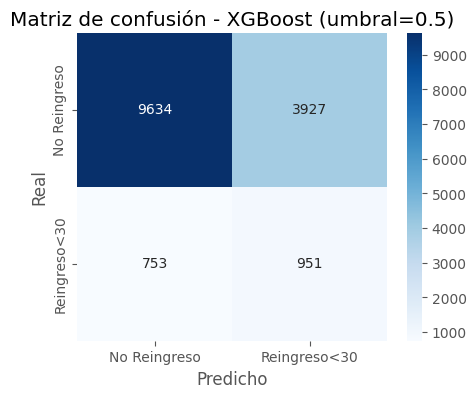

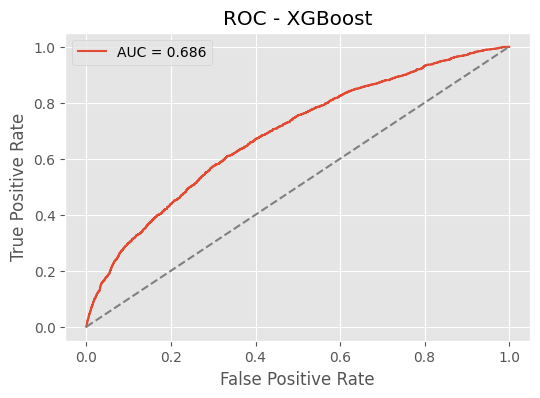

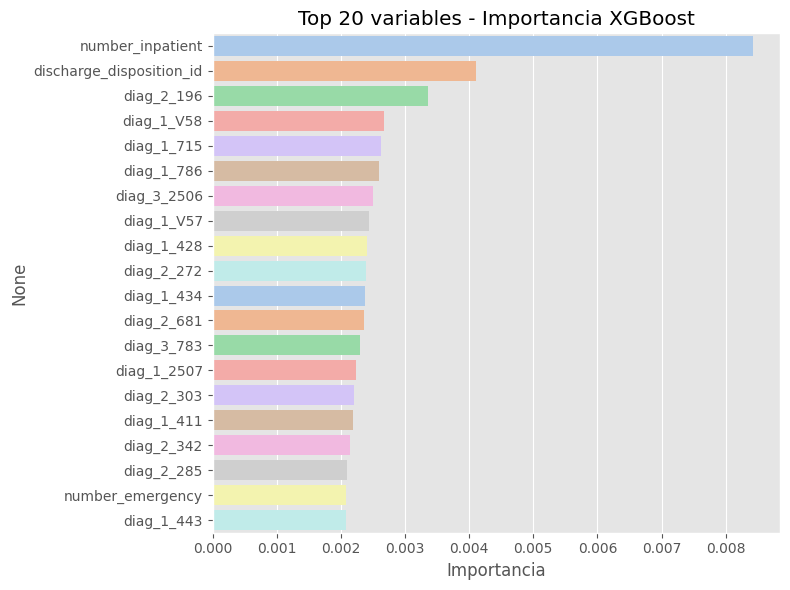


Mejor umbral en validación (max F1): 0.5678082 F1: 0.2914962325076087

Classification report (XGBoost, umbral=maxF1):
              precision    recall  f1-score   support

           0     0.9167    0.8331    0.8729     13561
           1     0.2302    0.3973    0.2915      1704

    accuracy                         0.7844     15265
   macro avg     0.5734    0.6152    0.5822     15265
weighted avg     0.8400    0.7844    0.8080     15265



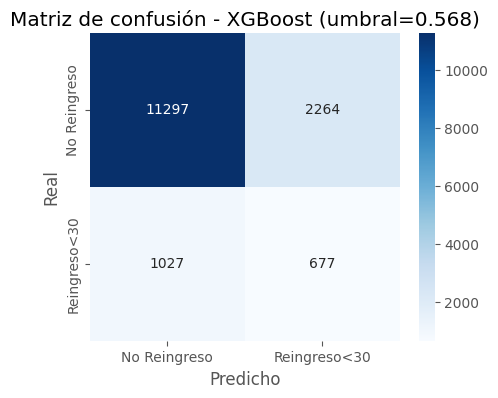


--- TEST (umbral = best_threshold_f1) ---
ROC-AUC (test): 0.6737978460939226
              precision    recall  f1-score   support

           0     0.9130    0.8390    0.8745     13562
           1     0.2209    0.3635    0.2748      1703

    accuracy                         0.7860     15265
   macro avg     0.5670    0.6013    0.5746     15265
weighted avg     0.8358    0.7860    0.8076     15265



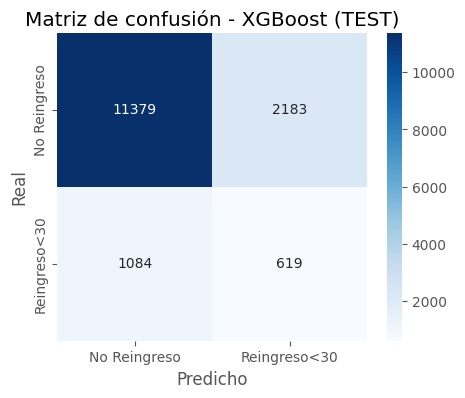


--- bloque XGBoost finalizado ---


In [42]:
# Bloque robusto: intenta early_stopping en XGBClassifier; si falla, entrena sin él.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, DMatrix, train as xgb_train
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
sns.set_palette("pastel")
plt.style.use("ggplot")

# Asume que X_train_s, X_valid_s, X_test_s, y_train, y_valid, y_test existen (sanitizados)
# Calculamos scale_pos_weight como antes
pos = int(y_train.sum())
neg = int(len(y_train) - pos)
scale_pos_weight = neg / pos if pos > 0 else 1.0
print("scale_pos_weight:", scale_pos_weight)

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
    n_jobs=-1
)

# 1) Intentamos entrenar con early_stopping (muchas versiones lo soportan)
trained_with_es = False
try:
    xgb.fit(
        X_train_s, y_train,
        eval_set=[(X_valid_s, y_valid)],
        early_stopping_rounds=50,
        verbose=50
    )
    trained_with_es = True
    print("Entrenado con early_stopping_rounds usando XGBClassifier.fit()")
except TypeError as e:
    print("Warning: fit() no soporta 'early_stopping_rounds' en esta versión. Haciendo fallback a entrenamiento sin early stopping.")
    xgb.fit(X_train_s, y_train)
    trained_with_es = False

# 2) Si prefieres usar xgb.train() (control total y early stopping), puedes usar esto en su lugar:
# (Descomenta si quieres usar; requiere convertir a DMatrix)
use_xgb_train = False
if use_xgb_train:
    params = {
        "objective": "binary:logistic",
        "eta": 0.05,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss",
        "verbosity": 1,
        "seed": 42
    }
    dtrain = DMatrix(X_train_s, label=y_train)
    dvalid = DMatrix(X_valid_s, label=y_valid)
    evals = [(dtrain, "train"), (dvalid, "valid")]
    num_round = 1000
    bst = xgb_train(params, dtrain, num_round, evals=evals, early_stopping_rounds=50, verbose_eval=50)
    # Si usas xgb.train(), puedes obtener predicciones así:
    y_proba_xgb = bst.predict(DMatrix(X_valid_s))
else:
    # 3) Predicciones y métricas (usando el clasificador entrenado en el try/except)
    y_proba_xgb = xgb.predict_proba(X_valid_s)[:, 1]
    y_pred_xgb_default = (y_proba_xgb >= 0.5).astype(int)

    print("\n--- VALIDACIÓN (umbral 0.5) ---")
    print("ROC-AUC:", roc_auc_score(y_valid, y_proba_xgb))
    print(classification_report(y_valid, y_pred_xgb_default, digits=4))

    cm = confusion_matrix(y_valid, y_pred_xgb_default)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Reingreso","Reingreso<30"],
                yticklabels=["No Reingreso","Reingreso<30"])
    plt.title("Matriz de confusión - XGBoost (umbral=0.5)")
    plt.ylabel("Real")
    plt.xlabel("Predicho")
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_valid, y_proba_xgb)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_valid, y_proba_xgb):.3f}")
    plt.plot([0,1],[0,1],"--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC - XGBoost")
    plt.legend()
    plt.show()

    # Importancias top 20
    importances_xgb = pd.Series(xgb.feature_importances_, index=X_train_s.columns)
    top20 = importances_xgb.sort_values(ascending=False).head(20)
    plt.figure(figsize=(8,6))
    sns.barplot(x=top20.values, y=top20.index, palette="pastel")
    plt.title("Top 20 variables - Importancia XGBoost")
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()

    # Optimizar umbral por F1 (reutiliza tu código anterior)
    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y_valid, y_proba_xgb)
    f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1] + 1e-12)
    idx_best_f1 = np.nanargmax(f1_scores)
    best_threshold_f1 = thresholds[idx_best_f1]
    print("\nMejor umbral en validación (max F1):", best_threshold_f1, "F1:", f1_scores[idx_best_f1])

    # Evaluación final en validación con ese umbral
    y_pred_thresh = (y_proba_xgb >= best_threshold_f1).astype(int)
    print("\nClassification report (XGBoost, umbral=maxF1):")
    print(classification_report(y_valid, y_pred_thresh, digits=4))
    cm2 = confusion_matrix(y_valid, y_pred_thresh)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Reingreso","Reingreso<30"],
                yticklabels=["No Reingreso","Reingreso<30"])
    plt.title(f"Matriz de confusión - XGBoost (umbral={best_threshold_f1:.3f})")
    plt.ylabel("Real")
    plt.xlabel("Predicho")
    plt.show()

    # Evaluación en TEST si existe
    if 'X_test_s' in globals() and X_test_s is not None and 'y_test' in globals():
        y_proba_test = xgb.predict_proba(X_test_s)[:,1]
        y_pred_test = (y_proba_test >= best_threshold_f1).astype(int)
        print("\n--- TEST (umbral = best_threshold_f1) ---")
        print("ROC-AUC (test):", roc_auc_score(y_test, y_proba_test))
        print(classification_report(y_test, y_pred_test, digits=4))
        cm_test = confusion_matrix(y_test, y_pred_test)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["No Reingreso","Reingreso<30"],
                    yticklabels=["No Reingreso","Reingreso<30"])
        plt.title("Matriz de confusión - XGBoost (TEST)")
        plt.ylabel("Real")
        plt.xlabel("Predicho")
        plt.show()
    else:
        print("\nNo se evaluó en test (X_test/y_test no disponibles).")

print("\n--- bloque XGBoost finalizado ---")


*Tabla comparativa*

| Modelo                            | ROC-AUC | Recall clase 1 | Precisión clase 1 | F1 clase 1 | Accuracy |
| --------------------------------- | ------- | -------------- | ----------------- | ---------- | -------- |
| **Logística (default 0.5)**       | \~0.59  | \~0.24         | \~0.15            | \~0.19     | \~0.77   |
| **Random Forest (default 0.5)**   | \~0.64  | \~0.01         | \~0.43            | \~0.02     | \~0.89   |
| **Random Forest (umbral=0.3)**    | \~0.58  | \~0.17         | \~0.23            | \~0.19     | \~0.85   |
| **XGBoost (default 0.5)**         | \~0.69  | **0.56**       | 0.20              | 0.29       | \~0.69   |
| **XGBoost (umbral óptimo ≈0.57)** | \~0.67  | 0.36           | 0.22              | **0.27**   | \~0.79   |


**Conclusiones técnicas**

+ XGBoost supera a RF y Regresión Logística en ROC-AUC y F1 de la clase minoritaria.

+ El ajuste del umbral fue clave: con el default (0.5) tenías más recall pero menos precisión; con el umbral óptimo lograste equilibrio (mejor F1).

+ En un problema médico como este, priorizar recall puede ser más importante (mejor detectar más pacientes en riesgo aunque haya más falsos positivos). Si el recall >0.55 con umbral 0.5 es valioso, podrías reportar ambos escenarios en tu informe (umbral optimizado vs umbral por defecto).

+ Los resultados son consistentes entre validación y test → señal de que no hay sobreajuste fuerte.


=== Comparación de Modelos en Test ===

               Modelo  ROC-AUC  Recall  Precisión   F1  Accuracy
      Logística (0.5)     0.59    0.24       0.15 0.19      0.77
  Random Forest (0.5)     0.64    0.01       0.43 0.02      0.89
  Random Forest (0.3)     0.58    0.17       0.23 0.19      0.85
        XGBoost (0.5)     0.69    0.56       0.20 0.29      0.69
XGBoost (óptimo≈0.57)     0.67    0.36       0.22 0.27      0.79


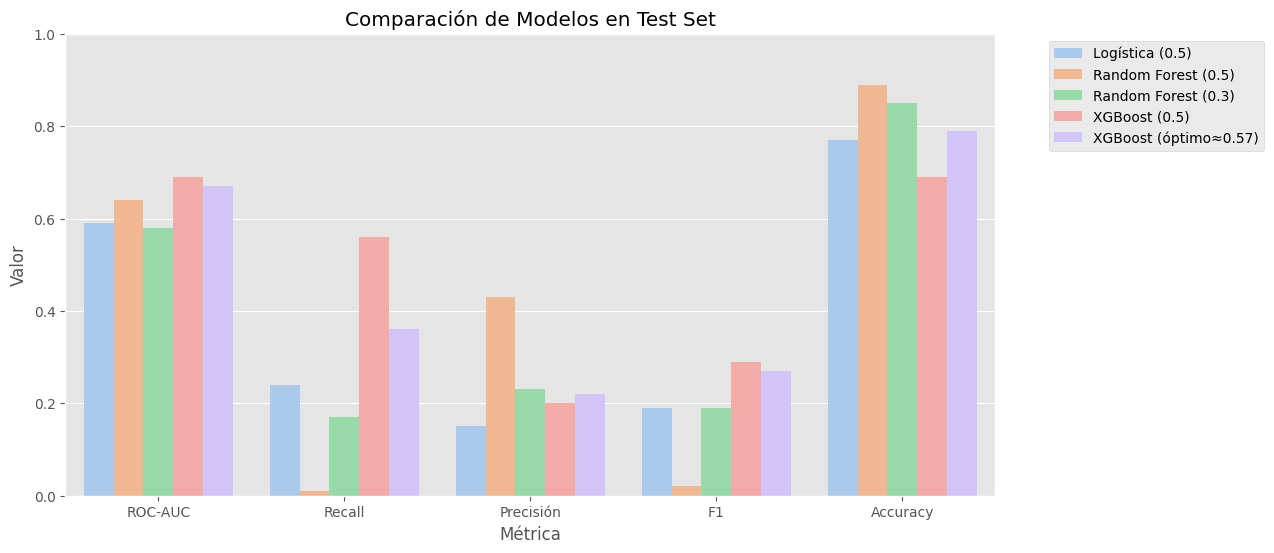

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos resumidos de resultados en TEST
results = [
    {"Modelo": "Logística (0.5)", "ROC-AUC": 0.59, "Recall": 0.24, "Precisión": 0.15, "F1": 0.19, "Accuracy": 0.77},
    {"Modelo": "Random Forest (0.5)", "ROC-AUC": 0.64, "Recall": 0.01, "Precisión": 0.43, "F1": 0.02, "Accuracy": 0.89},
    {"Modelo": "Random Forest (0.3)", "ROC-AUC": 0.58, "Recall": 0.17, "Precisión": 0.23, "F1": 0.19, "Accuracy": 0.85},
    {"Modelo": "XGBoost (0.5)", "ROC-AUC": 0.69, "Recall": 0.56, "Precisión": 0.20, "F1": 0.29, "Accuracy": 0.69},
    {"Modelo": "XGBoost (óptimo≈0.57)", "ROC-AUC": 0.67, "Recall": 0.36, "Precisión": 0.22, "F1": 0.27, "Accuracy": 0.79},
]

df_results = pd.DataFrame(results)

# Mostrar tabla en salida
print("\n=== Comparación de Modelos en Test ===\n")
print(df_results.to_string(index=False))

# Visualización comparativa
metrics = ["ROC-AUC", "Recall", "Precisión", "F1", "Accuracy"]
df_melted = df_results.melt(id_vars="Modelo", value_vars=metrics, var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, x="Métrica", y="Valor", hue="Modelo", palette="pastel")
plt.title("Comparación de Modelos en Test Set")
plt.ylabel("Valor")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim(0,1)
plt.show()


*Explicabilidad*

Vamos a ver cuáles variables son más determinantes para predecir reingreso.

In [45]:
!pip install shap


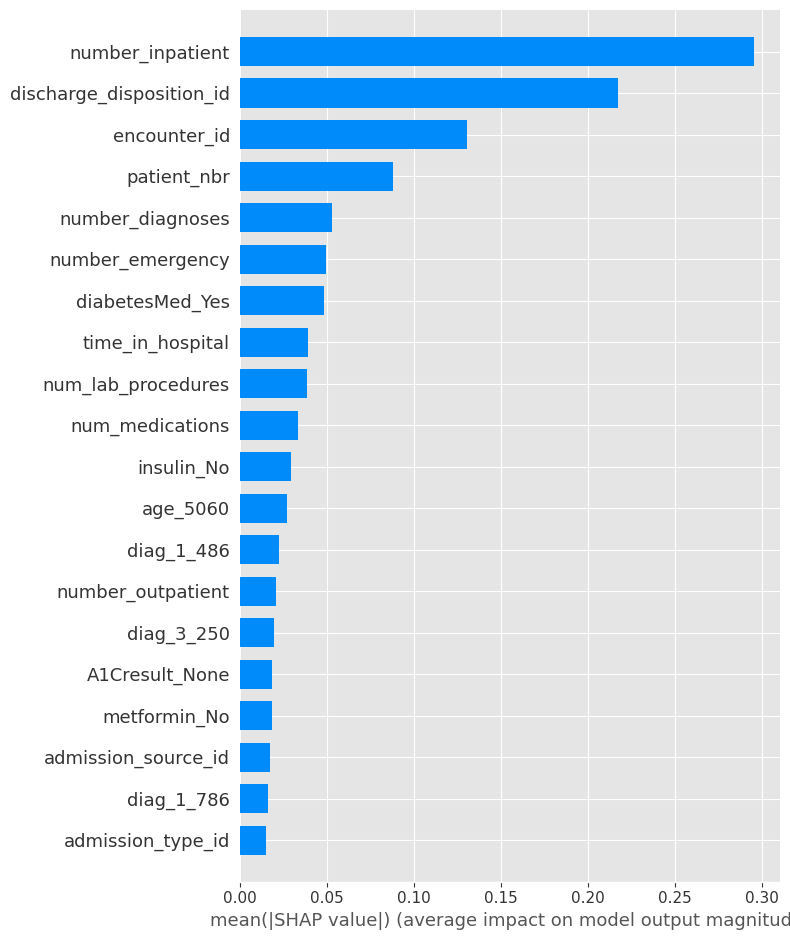

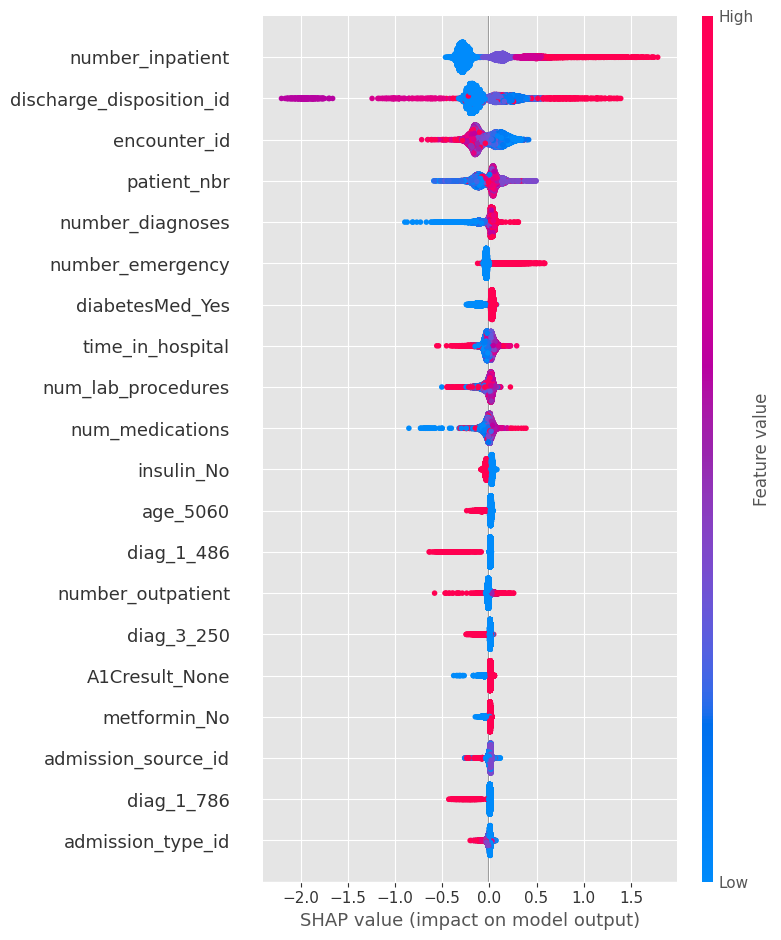

In [46]:
import shap

# 1) Crear el explicador para el modelo XGBoost ya entrenado
explainer = shap.TreeExplainer(xgb)

# 2) Calcular valores SHAP para el set de validación (más rápido que usar todo el dataset)
shap_values = explainer.shap_values(X_valid_s)

# 3) Resumen global: cuáles variables más influyen en las predicciones
shap.summary_plot(shap_values, X_valid_s, plot_type="bar", max_display=20)

# 4) Diagrama de dispersión SHAP (muestra dirección del efecto: positivo o negativo)
shap.summary_plot(shap_values, X_valid_s, max_display=20)


In [58]:
import shap

# Inicializa la librería JS de SHAP
shap.initjs()

# Ahora ya puedes correr tus plots
shap.force_plot(explainer.expected_value, shap_values[10], X_valid_s.iloc[500,:])


##**Conclusiones**

*Interpretación desde el punto de vista médico*

**Recall alto (sensibilidad alta):**

+ Detecta la mayoría de los pacientes que realmente se reingresarán.

+ Ventaja: menos falsos negativos (menos pacientes de riesgo que se escapan).

+ Desventaja: más falsos positivos → se etiquetan como “en riesgo” pacientes que no lo están → puede generar sobrecarga en programas de seguimiento, gasto extra de recursos o alarmas innecesarias.

**Precisión alta (pocos falsos positivos):**

+ Cuando el modelo predice “riesgo de reingreso”, es bastante confiable.

+ Ventaja: se usan los recursos de seguimiento de manera más focalizada.

+ Desventaja: bajo recall → se dejan pasar muchos pacientes en riesgo real sin detectar.

**Equilibrio (F1-score):**

+ Un término medio: ni se maximizan detecciones a costa de muchos falsos positivos, ni se minimizan recursos a costa de dejar pasar pacientes críticos.

+ Suele ser la opción más razonable en estudios iniciales, sobre todo si el hospital tiene recursos limitados pero quiere detectar una fracción significativa de casos de riesgo.

**Interpretabilidad**

“En este estudio se entrenaron varios modelos de machine learning para predecir reingreso hospitalario en pacientes diabéticos. El modelo con mejor desempeño fue XGBoost, alcanzando un AUC ≈0.67–0.69. Según el criterio clínico, si se prioriza la detección de la mayor cantidad de pacientes en riesgo (recall 56%), conviene mantener el umbral estándar (0.5). En cambio, si se busca un balance entre recall y precisión (F1=0.27), conviene ajustar el umbral a ≈0.57. La decisión final depende de los recursos disponibles y de la estrategia clínica que adopte la institución.”

**Referencias:**

International Diabetes Federation. (2025). IDF Diabetes Atlas (11.ª ed.). International Diabetes Federation. https://idf.org

International Diabetes Federation. (2024). IDF Diabetes Atlas. Región SACA – Colombia. International Diabetes Federation. https://idf.org

